In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [50]:
df=sns.load_dataset('titanic')
df=df[['survived','pclass','sex','age','fare','embarked']]
df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [51]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
fare,0
embarked,2


In [52]:
df["embarked"].fillna(df["embarked"].mode()[0],inplace=True)
df["age"].fillna(df["age"].median(),inplace=True)

/tmp/ipython-input-3264562184.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["embarked"].fillna(df["embarked"].mode()[0],inplace=True)
/tmp/ipython-input-3264562184.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [53]:
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,0
fare,0
embarked,0


In [54]:
encoder=LabelEncoder()
df["sex"]=encoder.fit_transform(df["sex"])
df["embarked"]=encoder.fit_transform(df["embarked"])
df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


In [55]:
x=df.drop("survived",axis=1)
y=df["survived"]

In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [57]:
classifier=DecisionTreeClassifier(
    criterion="gini",
    max_depth=6,
    random_state=42
)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=42)

In [58]:
y_pred=classifier.predict(x_test)
print(y_pred)
print(accuracy_score(y_test,y_pred))

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1]
0.8044692737430168


In [59]:
print(confusion_matrix(y_test,y_pred))

[[96  9]
 [26 48]]


<Axes: >

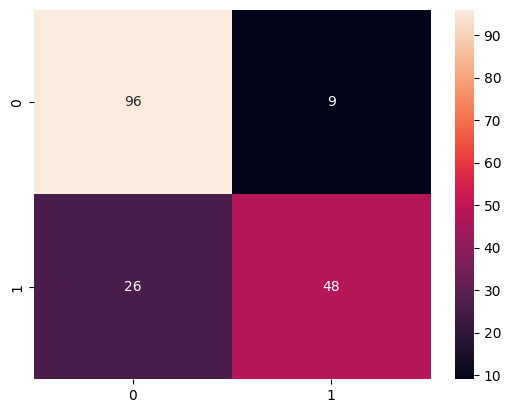

In [60]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

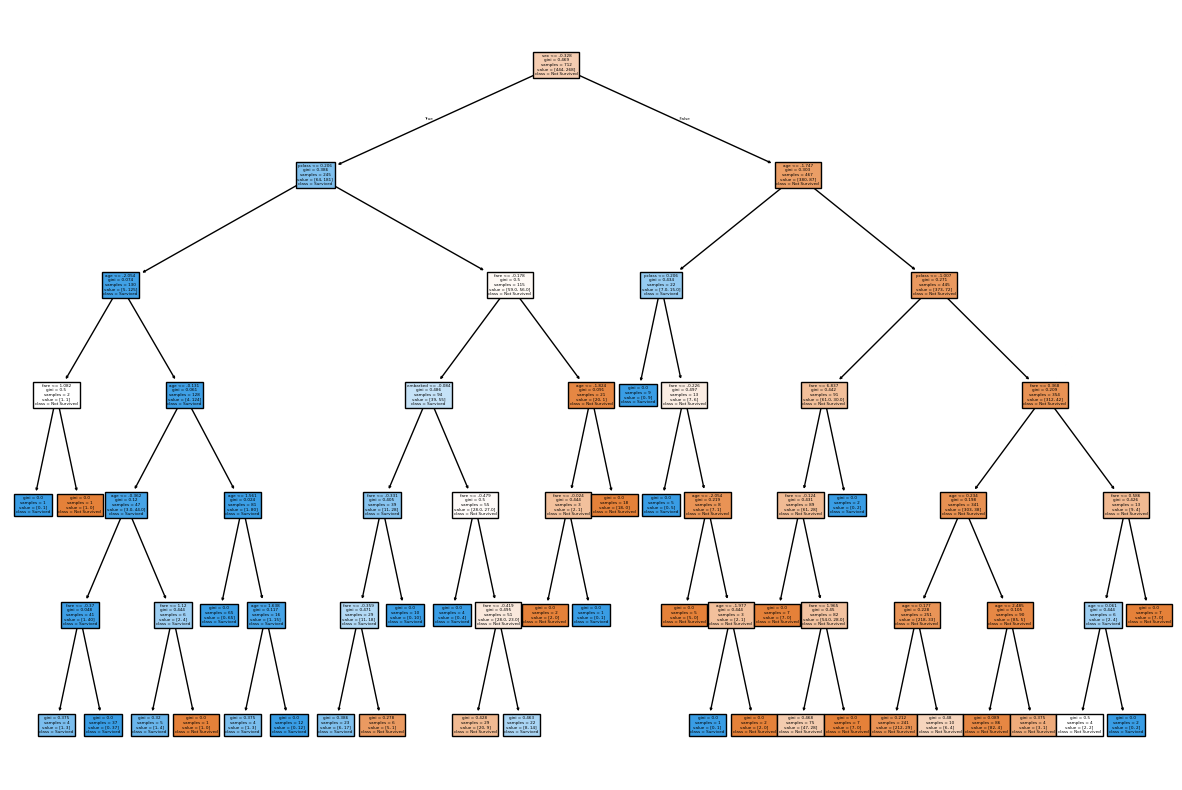

In [61]:
plt.figure(figsize=(15,10))
plot_tree(classifier,filled=True,feature_names=x.columns,class_names=["Not Survived","Survived"])
plt.show()

In [62]:
new_passenger=pd.DataFrame([[3,1,25,7,2]],columns=x.columns)
prediction=classifier.predict(new_passenger)
prediction

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


array([0])

In [63]:
if prediction[0]==1:
  print("Survived")
else:
  print("Not Survived")

Not Survived
